In [1]:
import os

import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pylab as plt

from utils.datasets import DATASET_DIR

In [2]:
market = pd.read_parquet(os.path.join(DATASET_DIR, 'market/bitstamp-btcusd-1h.parquet'))[['timestamp', 'close']]
market = market.groupby(market['timestamp'].dt.date).mean()
market['diff'] = market['close'].pct_change()
market.head()

,close,diff
timestamp,,
2013-03-04,35.674444,NaN
2013-03-05,39.347083,0.102949
2013-03-06,46.017083,0.169517
2013-03-07,42.331250,-0.080097
2013-03-08,43.064583,0.017324


In [15]:
sentiment = pd.read_parquet(os.path.join(DATASET_DIR, 'sentiment_results/outputs400000.parquet'))
data = pd.read_parquet(os.path.join(DATASET_DIR, 'sentiment_dataset/test2'))[['_id', 'created_at']]

data.head()

,_id,created_at
0,1357844105125126144,2021-02-06 00:10:36
1,1377279418306023425,2021-03-31 15:19:36
2,1374595225692172292,2021-03-24 05:33:35
3,1381289628330819586,2021-04-11 16:54:45
4,1357351491976245249,2021-02-04 15:33:08


In [16]:
sentiment_timeserias = sentiment.set_index('eid').join(data.set_index('_id'))
sentiment_timeserias.sort_values(by='created_at', inplace=True)
sentiment_timeserias.head()

,output,created_at
eid,,
1356029514439155714,"[-0.47953936, -0.019823734, -0.3509242, 0.8236...",2021-02-01 00:00:04
1356029517123514371,"[-0.2642702, 0.18897545, -0.26537043, 0.804812...",2021-02-01 00:00:05
1356029561264349185,"[0.20321827, 0.10668542, -0.3683648, 0.0788236...",2021-02-01 00:00:15
1356029567786430467,"[-0.49379474, -0.021136368, -0.35506275, 0.506...",2021-02-01 00:00:17
1356029604809551873,"[0.65135396, 0.26103285, 0.23404838, 0.2491152...",2021-02-01 00:00:26


In [17]:
features = [
    'USDBTC-12h', 'USDBTC+12h', 'USDBTC+1d', 'USDBTC+2d', 'USDBTC+7d', 'USDBTC+14d',
    'USDETH-12h', 'USDETH+12h', 'USDETH+1d', 'USDETH+2d', 'USDETH+7d', 'USDETH+14d',
    'USDXRP-12h', 'USDXRP+12h', 'USDXRP+1d', 'USDXRP+2d', 'USDXRP+7d', 'USDXRP+14d'
]

sentiment_timeserias[features] = pd.DataFrame(sentiment_timeserias['output'].tolist(), index=sentiment_timeserias.index)
sentiment_timeserias.drop(columns=['output'], inplace=True)
sentiment_timeserias.head()

,created_at,USDBTC-12h,USDBTC+12h,USDBTC+1d,USDBTC+2d,USDBTC+7d,USDBTC+14d,USDETH-12h,USDETH+12h,USDETH+1d,USDETH+2d,USDETH+7d,USDETH+14d,USDXRP-12h,USDXRP+12h,USDXRP+1d,USDXRP+2d,USDXRP+7d,USDXRP+14d
eid,,,,,,,,,,,,,,,,,,,
1356029514439155714,2021-02-01 00:00:04,-0.479539,-0.019824,-0.350924,0.823678,-0.368091,-0.750125,-0.476256,-0.365869,-0.020719,-0.691939,-0.304823,0.209722,0.022165,0.324419,-0.407227,-1.127386,0.388956,-0.417355
1356029517123514371,2021-02-01 00:00:05,-0.264270,0.188975,-0.265370,0.804812,-0.502088,-0.672623,-0.618074,-0.731584,0.551225,-0.879139,-0.435633,-0.010006,-0.136919,-0.142877,-0.398350,-1.087780,0.602108,-0.231490
1356029561264349185,2021-02-01 00:00:15,0.203218,0.106685,-0.368365,0.078824,-0.147543,-0.113394,-0.775826,-0.214058,-0.018956,-0.446182,-0.102108,1.002741,0.104607,0.385746,-0.025665,-1.087965,0.802489,-1.173873
1356029567786430467,2021-02-01 00:00:17,-0.493795,-0.021136,-0.355063,0.506225,-0.804567,-0.631736,-0.357231,-0.242057,0.640478,-0.572822,-0.048157,0.426331,-0.580058,-0.079005,-0.358370,-1.013013,0.594740,-0.300748
1356029604809551873,2021-02-01 00:00:26,0.651354,0.261033,0.234048,0.249115,0.220130,0.352196,-0.688238,-0.292158,-0.216914,-0.407890,-0.307310,1.197481,-0.075280,0.474252,0.145687,-1.267555,0.584454,-1.059287


In [18]:
sentiment_timeserias = sentiment_timeserias[sentiment_timeserias['created_at'] > dt.datetime(year=2021, month=1, day=1)]
sentiment_timeseries_daily = sentiment_timeserias.groupby(sentiment_timeserias['created_at'].dt.date).mean()
sentiment_timeseries_daily['market_diff'] = market['diff']
sentiment_timeseries_daily.head()

,USDBTC-12h,USDBTC+12h,USDBTC+1d,USDBTC+2d,USDBTC+7d,USDBTC+14d,USDETH-12h,USDETH+12h,USDETH+1d,USDETH+2d,USDETH+7d,USDETH+14d,USDXRP-12h,USDXRP+12h,USDXRP+1d,USDXRP+2d,USDXRP+7d,USDXRP+14d,market_diff
created_at,,,,,,,,,,,,,,,,,,,
2021-02-01,0.247319,0.126876,-0.176983,0.055571,-0.180782,-0.226556,-0.548911,-0.099305,0.120890,-0.541948,-0.278273,0.791799,0.136894,0.370972,-0.230641,-1.168091,0.712737,-0.754499,0.009160
2021-02-02,0.243326,0.120530,-0.178736,0.053709,-0.176455,-0.214194,-0.554792,-0.096903,0.102015,-0.530833,-0.288825,0.791950,0.135797,0.382103,-0.230415,-1.167290,0.708772,-0.756864,0.030911
2021-02-03,0.241249,0.119091,-0.172203,0.044395,-0.169758,-0.204548,-0.558367,-0.107787,0.100516,-0.524343,-0.281467,0.799721,0.135134,0.383326,-0.224944,-1.173093,0.704199,-0.759274,0.053792
2021-02-04,0.255772,0.117743,-0.181175,0.029212,-0.174423,-0.217373,-0.549995,-0.080523,0.116571,-0.526963,-0.280780,0.805958,0.139483,0.375615,-0.230288,-1.171730,0.703352,-0.757807,0.024629
2021-02-05,0.246410,0.117019,-0.185307,0.033139,-0.174923,-0.209829,-0.546523,-0.089594,0.098721,-0.527643,-0.294254,0.789194,0.159266,0.385368,-0.226971,-1.169241,0.696351,-0.763209,0.002776


In [20]:
columns = ['market_diff', 'USDBTC+1d', 'USDBTC+7d', 'USDBTC+14d']
plot_df = sentiment_timeseries_daily[columns].copy()
plot_df.head()

,market_diff,USDBTC+1d,USDBTC+7d,USDBTC+14d
created_at,,,,
2021-02-01,0.009160,-0.176983,-0.180782,-0.226556
2021-02-02,0.030911,-0.178736,-0.176455,-0.214194
2021-02-03,0.053792,-0.172203,-0.169758,-0.204548
2021-02-04,0.024629,-0.181175,-0.174423,-0.217373
2021-02-05,0.002776,-0.185307,-0.174923,-0.209829


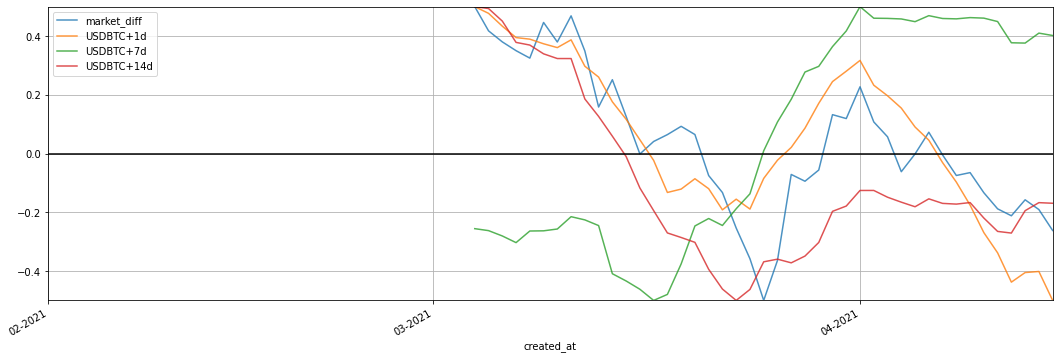

In [21]:
plt.rcParams['figure.figsize'] = [18, 6]

df2 = pd.DataFrame()

columns = ['market_diff', 'USDBTC+1d', 'USDBTC+7d', 'USDBTC+14d']

plot_df = sentiment_timeseries_daily[columns].copy()
for c in columns:
    plot_df[c] = plot_df[c].rolling(32).mean()
    plot_df[c] = (plot_df[c] - plot_df[c].min()) / ( plot_df[c].max() - plot_df[c].min()) - 0.5

ax = plot_df.plot(alpha=0.8)
ax.grid(True)
ax.axhline(y=0, color='k')
ax.set_ylim([-0.5, 0.5])
ax.set_xlim([sentiment_timeseries_daily.index.min(), sentiment_timeseries_daily.index.max()])
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.gcf().autofmt_xdate()

plt.savefig('sentiment.png')

In [22]:
def crosscorr(a, b, lag=0):
    return a.corr(b.shift(lag))


cross_df = sentiment_timeseries_daily[columns].copy()
for c in columns:
    cross_df[c] = (cross_df[c] - cross_df[c].min()) / ( cross_df[c].max() - cross_df[c].min()) - 0.5

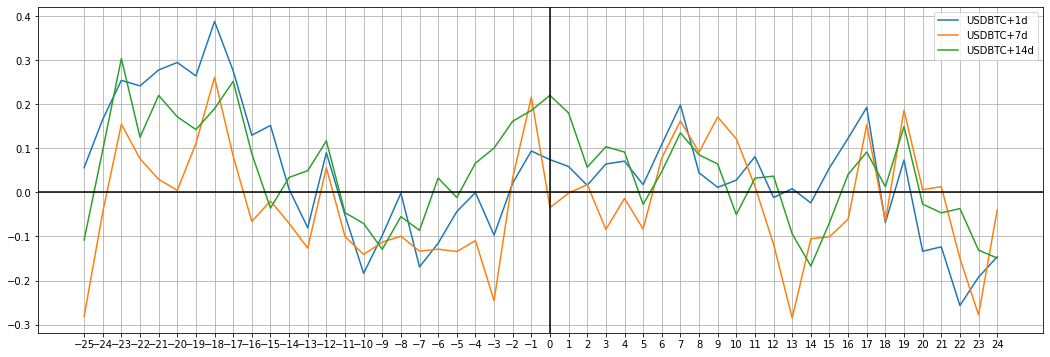

In [23]:
max_lag = 50
lags = [int(i - max_lag/2) for i in range(max_lag)]

data = pd.DataFrame( {
    col: [crosscorr(cross_df['market_diff'], cross_df[col], lag=lag) for lag in lags]
    for col in columns[1:]
}, index=lags)

ax = data.plot()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.xticks(lags)
ax.grid(True)

plt.savefig('correlation.png')